In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

yf.pdr_override()

y_symbols = ['^GSPC', '^MXX', '^FCHI','^NYA','^JKSE', '^RUT','^KS11' ]

start_date = dt.datetime(2000,1,1)
end_date = dt.datetime(2020,1,2)


In [2]:
def convert_to_USD(index_data, currency):
    # get historical conversion rate to USD
    tckr = yf.Ticker(currency+"USD=X")
    df = tckr.history(start=start_date, end=end_date)
    # fixing stupid error in the data
    if currency=="IDR":
        df.loc["2010-11-01"]=df.loc["2010-11-02"]
    currency_data = df.resample('BMS').first()
    
    # convert the data
    for item in index_data.items():
        closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
        #print(item[0])
        #print("closest date: " + str(closest_date))
        #print("before: " + str(item[1]))
        exchange_rate = currency_data.loc[closest_date]["Open"]
        #print("exchange_rate: " + str(exchange_rate))
        index_data[item[0]] = item[1]*exchange_rate
        #print("after: " + str(index_data[item[0]]))
        #print("________________________________")
    
    return index_data

In [3]:
data = pdr.get_data_yahoo(y_symbols, start=start_date, end=end_date, interval='1mo')['Adj Close']

data["^FCHI"] = convert_to_USD(data["^FCHI"], "EUR")
data["^MXX"] = convert_to_USD(data["^MXX"], "MXN")
data["^JKSE"] = convert_to_USD(data["^JKSE"], "IDR")
data["^KS11"] = convert_to_USD(data["^KS11"], "KRW")


[*********************100%***********************]  7 of 7 completed


C:\Users\fiori\AppData\Local\Temp\ipykernel_6496\3324130515.py:12: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
C:\Users\fiori\AppData\Local\Temp\ipykernel_6496\3324130515.py:12: FutureWarning: Passing method to DatetimeIndex.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]
C:\Users\fiori\AppData\Local\Temp\ipykernel_6496\3324130515.py:12: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  closest_date = currency_data.index[currency_data.index.get_loc(item[0], method='nearest')]


In [4]:
# 10 years sliding window
sliding_windows_data = {}

for j in range(11):
    i=12*j
    returns = (data / data.shift(1))[1+i:12*10+i]
    print(returns)
    logReturn = np.log(returns)
    #var(aX) = a^2var(X), cov(aX, aX) = a^2 cov(X,X)
    yearly_mean = 12 * logReturn.mean()
    yearly_var = 12 * logReturn.var()
    yearly_std = np.sqrt(yearly_var)
    yearly_cov = 12 * logReturn.cov()

    dates = (data.index[i], data.index[12*10+i])

    sliding_windows_data[str(j+1) +'_yearly_mean'] = yearly_mean
    sliding_windows_data[str(j+1) +'_yearly_var'] = yearly_var
    sliding_windows_data[str(j+1) +'_yearly_std'] = yearly_std
    sliding_windows_data[str(j+1) +'_yearly_cov'] = yearly_cov
    sliding_windows_data[str(j+1) +'_dates'] = dates
    
    

               ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA  \
Date                                                                     
2000-02-01  1.093846  0.979892  0.905983  0.877633  1.118876  0.953211   
2000-03-01  1.015359  1.096720  1.011680  1.039306  1.014209  1.092906   
2000-04-01  1.021265  0.969204  0.903066  0.842556  0.888593  0.994533   
2000-05-01  1.001019  0.978085  0.862531  1.008947  0.897670  0.999131   
2000-06-01  1.003156  1.023934  1.133787  1.122069  1.165604  0.998960   
...              ...       ...       ...       ...       ...       ...   
2009-08-01  1.095112  1.033560  1.061341  1.072156  1.038173  1.034083   
2009-09-01  1.024590  1.035723  1.006982  1.022577  1.027590  1.040288   
2009-10-01  0.972133  0.980238  0.999108  1.017091  0.968300  0.975194   
2009-11-01  1.031911  1.057364  1.030396  0.979056  1.102110  1.052365   
2009-12-01  1.093058  1.017771  1.078721  1.085105  1.063858  1.013056   

                ^RUT  
Date          

In [5]:
sliding_windows_data

{'1_yearly_mean': ^FCHI   -0.014171
 ^GSPC   -0.022544
 ^JKSE    0.131009
 ^KS11    0.061436
 ^MXX     0.145157
 ^NYA     0.008961
 ^RUT     0.023328
 dtype: float64,
 '1_yearly_var': ^FCHI    0.049806
 ^GSPC    0.026898
 ^JKSE    0.095920
 ^KS11    0.096574
 ^MXX     0.060982
 ^NYA     0.027178
 ^RUT     0.048064
 dtype: float64,
 '1_yearly_std': ^FCHI    0.223172
 ^GSPC    0.164005
 ^JKSE    0.309710
 ^KS11    0.310763
 ^MXX     0.246946
 ^NYA     0.164857
 ^RUT     0.219235
 dtype: float64,
 '1_yearly_cov':           ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
 ^FCHI  0.049806  0.030266  0.026973  0.043901  0.037011  0.029514  0.037037
 ^GSPC  0.030266  0.026898  0.020098  0.032241  0.030335  0.026041  0.029215
 ^JKSE  0.026973  0.020098  0.095920  0.057075  0.043570  0.023511  0.029088
 ^KS11  0.043901  0.032241  0.057075  0.096574  0.048179  0.031714  0.038048
 ^MXX   0.037011  0.030335  0.043570  0.048179  0.060982  0.029814  0.043266
 ^NYA   0.029514  0.026

In [6]:
#expected yearly returns:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_mean'])
    print("____________________________________________________________")

SLIDING WINDOW  1
^FCHI   -0.014171
^GSPC   -0.022544
^JKSE    0.131009
^KS11    0.061436
^MXX     0.145157
^NYA     0.008961
^RUT     0.023328
dtype: float64
____________________________________________________________
SLIDING WINDOW  2
^FCHI   -0.038160
^GSPC   -0.008335
^JKSE    0.218437
^KS11    0.124104
^MXX     0.168452
^NYA     0.012764
^RUT     0.043645
dtype: float64
____________________________________________________________
SLIDING WINDOW  3
^FCHI   -0.023635
^GSPC    0.010771
^JKSE    0.205159
^KS11    0.094875
^MXX     0.149197
^NYA     0.020247
^RUT     0.043126
dtype: float64
____________________________________________________________
SLIDING WINDOW  4
^FCHI    0.029403
^GSPC    0.051513
^JKSE    0.211405
^KS11    0.135330
^MXX     0.186215
^NYA     0.055520
^RUT     0.083205
dtype: float64
____________________________________________________________
SLIDING WINDOW  5
^FCHI    0.024433
^GSPC    0.049521
^JKSE    0.142523
^KS11    0.099046
^MXX     0.136537
^NYA     0.0

In [7]:
#cov_matrices:
for j in range(11):
    print("SLIDING WINDOW ", j+1)
    print(sliding_windows_data[str(j+1) +'_yearly_cov'])
    print("____________________________________________________________")

SLIDING WINDOW  1
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.049806  0.030266  0.026973  0.043901  0.037011  0.029514  0.037037
^GSPC  0.030266  0.026898  0.020098  0.032241  0.030335  0.026041  0.029215
^JKSE  0.026973  0.020098  0.095920  0.057075  0.043570  0.023511  0.029088
^KS11  0.043901  0.032241  0.057075  0.096574  0.048179  0.031714  0.038048
^MXX   0.037011  0.030335  0.043570  0.048179  0.060982  0.029814  0.043266
^NYA   0.029514  0.026041  0.023511  0.031714  0.029814  0.027178  0.028480
^RUT   0.037037  0.029215  0.029088  0.038048  0.043266  0.028480  0.048064
____________________________________________________________
SLIDING WINDOW  2
          ^FCHI     ^GSPC     ^JKSE     ^KS11      ^MXX      ^NYA      ^RUT
^FCHI  0.053186  0.032035  0.030609  0.047606  0.038069  0.032161  0.037629
^GSPC  0.032035  0.027883  0.021728  0.031207  0.029539  0.027829  0.032200
^JKSE  0.030609  0.021728  0.089497  0.049644  0.039543  0.026348  

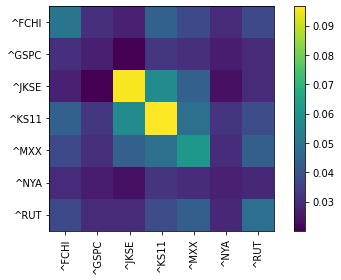

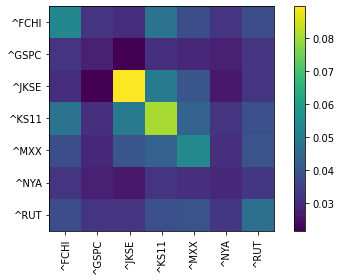

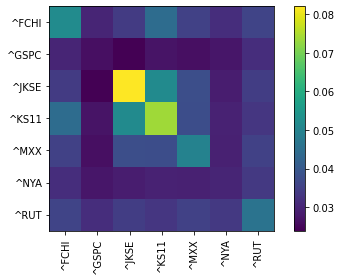

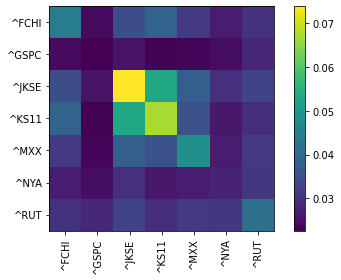

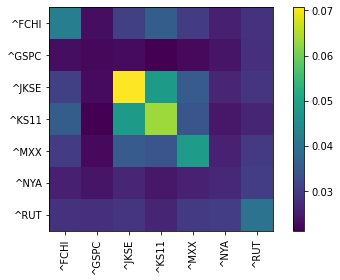

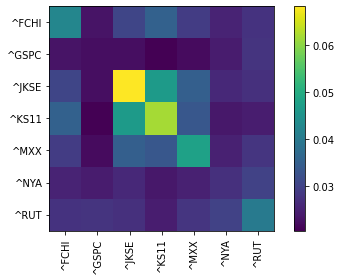

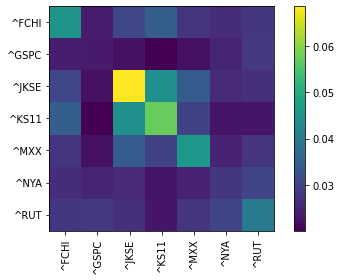

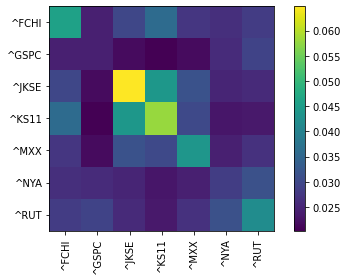

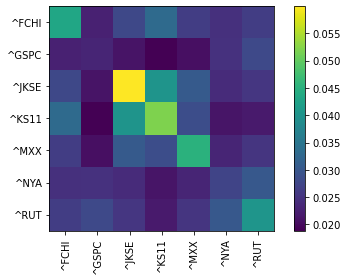

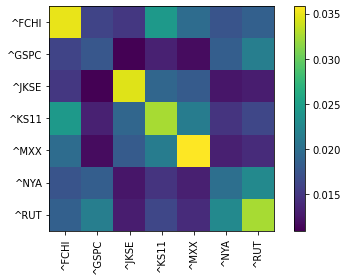

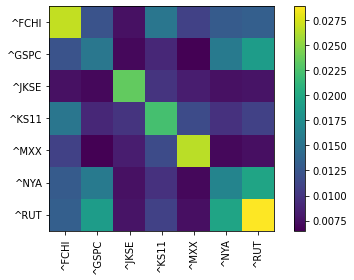

In [8]:
from pypfopt.plotting import plot_covariance
#cov_matrices:
for j in range(11):
    plot_covariance(sliding_windows_data[str(j+1) +'_yearly_cov'])

#### Efficient frontiers

C:\Users\fiori\AppData\Local\Temp\ipykernel_6496\1617126543.py:24: RuntimeWarning: invalid value encountered in divide
  weights /= np.sum(weights)


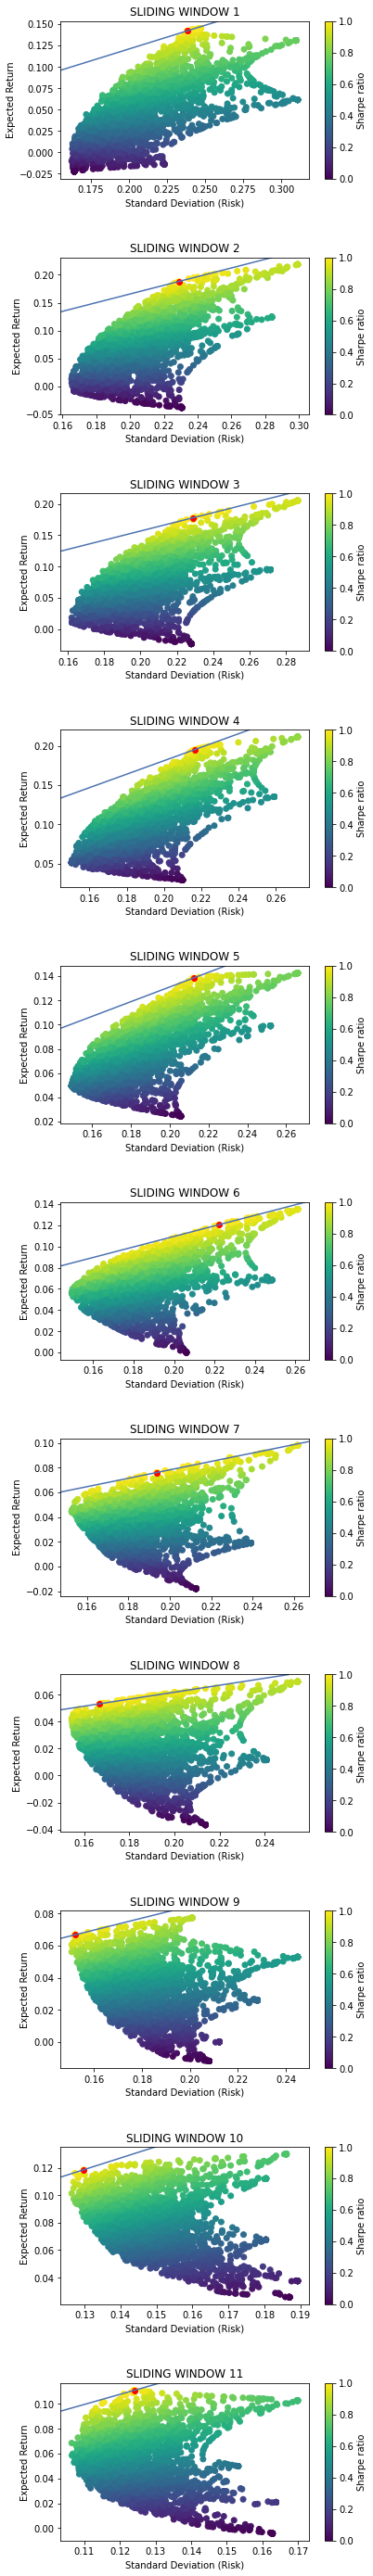

In [9]:
import numpy as np
import matplotlib.pyplot as plt

risk_free_rate = 0.01

 #take a list of lists of frontier returns and variances
f_r = []
f_v = []
sharper = []
w = [] #append weights for each portfolio
frontiers_portfolios = []
highest_sharper_portfolios = []

for j in range(11):
    returns = sliding_windows_data[str(j+1) +'_yearly_mean']
    covariances = sliding_windows_data[str(j+1) +'_yearly_cov']

    frontier_mean_returns = []
    frontier_stds = []

    for i in range(3000):
        weights = np.random.normal(0, 1, size=7) #use normal distribution
        weights = [x if x >= 0 else 0 for x in weights]  
        weights /= np.sum(weights)
        if np.isnan(weights).any():
            continue
        portfolio_return = np.sum(returns * weights)
        portfolio_std = np.sqrt(np.dot(weights.T, np.dot(covariances, weights)))
        frontier_mean_returns.append(portfolio_return)
        frontier_stds.append(portfolio_std)
        w.append(weights)
    frontiers_portfolios.append(w)
    f_r.append(frontier_mean_returns)
    f_v.append(frontier_stds)

    # highest sharper portfolio
    sharper.append(np.array(frontier_mean_returns) / np.array(frontier_stds))
    index = sharper[-1].argmax(axis=0)
    highest_sharper_portfolios.append({
        "dates": sliding_windows_data[str(j+1) +'_dates'],
        "return": frontier_mean_returns[index],
        "std": frontier_stds[index],
        "weights": frontiers_portfolios[j][index]})

    

    
# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    im = axs[i].scatter(f_v[i], f_r[i], c=sharper[i])
    im = axs[i].scatter(highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"], c="red")
    # plotting capital market line (tobin separation)
    # equivalent to 
    #axs[i].axline((0, risk_free_rate), (highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"]))
    # but prettier
    axs[i].axline(
        (min(f_v[i]), (min(f_v[i])/highest_sharper_portfolios[i]["std"])*(highest_sharper_portfolios[i]["return"]-risk_free_rate)+risk_free_rate),
        (highest_sharper_portfolios[i]["std"], highest_sharper_portfolios[i]["return"]))
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    plt.colorbar(im, ax=axs[i], label = 'Sharpe ratio')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()



In [10]:
# Asset Allocation
# I'm calculating optimal asset allocation and turnover for each time window. Maybe we're supposed to do it for each year idk 
# (should anual rebalancing happen based on the last year or based on the last 10 year window?)

# required rate of return
rrr = 0.05

# optimal asset allocation:
# mix of max sharpe ratio portfolio and risk free rate that reaches RRR

for i, portfolio in enumerate(highest_sharper_portfolios):

    risk_free_rate_portion = (rrr - portfolio["return"]) / (risk_free_rate - portfolio["return"])
    highest_sharper_portfolios[i]["risk_free_rate_portion"] = risk_free_rate_portion
    highest_sharper_portfolios[i]["weights_incl_rf"] = np.append(portfolio["weights"]*(1-risk_free_rate_portion), risk_free_rate_portion)

    print(f"""{round(risk_free_rate_portion*100)}% of the portfolio in window {str(i+1)} should be risk free at {risk_free_rate*100}%, the remaining {round((1-risk_free_rate_portion)*100)}% have a return of {round(portfolio["return"]*100)}%""")


70% of the portfolio in window 1 should be risk free at 1.0%, the remaining 30% have a return of 14%
78% of the portfolio in window 2 should be risk free at 1.0%, the remaining 22% have a return of 19%
76% of the portfolio in window 3 should be risk free at 1.0%, the remaining 24% have a return of 18%
78% of the portfolio in window 4 should be risk free at 1.0%, the remaining 22% have a return of 20%
69% of the portfolio in window 5 should be risk free at 1.0%, the remaining 31% have a return of 14%
64% of the portfolio in window 6 should be risk free at 1.0%, the remaining 36% have a return of 12%
39% of the portfolio in window 7 should be risk free at 1.0%, the remaining 61% have a return of 8%
8% of the portfolio in window 8 should be risk free at 1.0%, the remaining 92% have a return of 5%
30% of the portfolio in window 9 should be risk free at 1.0%, the remaining 70% have a return of 7%
63% of the portfolio in window 10 should be risk free at 1.0%, the remaining 37% have a return 

In [11]:
# turnover
# For turnover I'm considering all assets, not just risk free. Not sure if it's correct.
for i, (portfolio, previous_portfolio) in enumerate(zip(highest_sharper_portfolios[1:], highest_sharper_portfolios)):
    
    unchanged_assets = [min(weight_pair) for weight_pair in zip(portfolio["weights_incl_rf"], previous_portfolio["weights_incl_rf"])]
    turnover_rate = 1-sum(unchanged_assets)
    print(f"turnover rate from sliding window {i+1} to sliding window {i+2} is {round(turnover_rate*100)}%")


turnover rate from sliding window 1 to sliding window 2 is 24%
turnover rate from sliding window 2 to sliding window 3 is 22%
turnover rate from sliding window 3 to sliding window 4 is 11%
turnover rate from sliding window 4 to sliding window 5 is 22%
turnover rate from sliding window 5 to sliding window 6 is 26%
turnover rate from sliding window 6 to sliding window 7 is 34%
turnover rate from sliding window 7 to sliding window 8 is 75%
turnover rate from sliding window 8 to sliding window 9 is 92%
turnover rate from sliding window 9 to sliding window 10 is 70%
turnover rate from sliding window 10 to sliding window 11 is 29%


In [12]:
data

,^FCHI,^GSPC,^JKSE,^KS11,^MXX,^NYA,^RUT
Date,,,,,,,
2000-01-01,6811.006068,1394.459961,0.055622,0.788340,589.184603,6574.009766,496.230011
2000-02-01,7450.190983,1366.420044,0.050393,0.691873,659.224671,6266.419922,577.710022
2000-03-01,7564.621943,1498.579956,0.050981,0.719068,668.591637,6848.609863,539.090027
2000-04-01,7725.480694,1452.430054,0.046039,0.605855,594.106075,6811.169922,506.250000
2000-05-01,7733.350379,1420.599976,0.039710,0.611275,533.311269,6805.250000,476.179993
...,...,...,...,...,...,...,...
2019-09-01,6240.427184,2976.739990,0.435118,1.705747,2140.460400,13004.740234,1523.369995
2019-10-01,6245.078868,3037.560059,0.437938,1.740221,2196.205403,13171.809570,1562.449951
2019-11-01,6587.870861,3140.979980,0.425586,1.787178,2226.101606,13545.209961,1624.500000


In [13]:
# Backtest (probably not correct yet)
for i, portfolio in enumerate(highest_sharper_portfolios[:-1]):
    symbol_weight_pairs = [pair for pair in zip(data.columns, portfolio['weights_incl_rf']) if pair[1]] + [("risk free asset", portfolio['weights_incl_rf'][-1])]
    print(f"Year: {portfolio['dates'][1].year}")
    print(f"Weights: {', '.join([str(round(weight*100))+'% '+symbol for symbol, weight in symbol_weight_pairs])}")
    

    returns = (data / data.shift(1))[i*12+120:i*12+120+12]#*portfolio["weights"]
    logReturn = np.log(returns)
    logReturn["rf"] = [risk_free_rate]*12
    #var(aX) = a^2var(X), cov(aX, aX) = a^2 cov(X,X)
    weighted_return = np.sum(logReturn*portfolio["weights_incl_rf"]).mean()
    print(f"Return: " + str(round(weighted_return,4)))

    weighted_var = ((logReturn.var()*portfolio["weights_incl_rf"])*len(logReturn.columns)).mean()
    weighted_std = np.sqrt(weighted_var)

    #print(f"Return: {str(round((total_weighted_return-1)*100))}%")
    print(f"Standard deviation: " + str(round(weighted_std,4)))

Year: 2010
Weights: 6% ^JKSE, 24% ^MXX, 70% risk free asset
Return: 0.0203
Standard deviation: 0.0295
Year: 2011
Weights: 22% ^JKSE, 78% risk free asset
Return: 0.0124
Standard deviation: 0.0254
Year: 2012
Weights: 1% ^FCHI, 15% ^GSPC, 2% ^JKSE, 6% ^RUT, 76% risk free asset
Return: 0.0151
Standard deviation: 0.0164
Year: 2013
Weights: 3% ^FCHI, 4% ^GSPC, 9% ^JKSE, 0% ^NYA, 6% ^RUT, 78% risk free asset
Return: 0.0138
Standard deviation: 0.0194
Year: 2014
Weights: 3% ^JKSE, 15% ^KS11, 1% ^MXX, 12% ^RUT, 69% risk free asset
Return: 0.01
Standard deviation: 0.0225
Year: 2015
Weights: 10% ^FCHI, 9% ^JKSE, 7% ^KS11, 0% ^MXX, 11% ^NYA, 64% risk free asset
Return: 0.0046
Standard deviation: 0.03
Year: 2016
Weights: 0% ^FCHI, 20% ^JKSE, 19% ^KS11, 21% ^NYA, 1% ^RUT, 39% risk free asset
Return: 0.0127
Standard deviation: 0.0278
Year: 2017
Weights: 42% ^GSPC, 17% ^NYA, 34% ^RUT, 8% risk free asset
Return: 0.0187
Standard deviation: 0.0153
Year: 2018
Weights: 70% ^JKSE, 30% risk free asset
Return:

In [14]:
#The results might change between runs because the points are computed at random

In [15]:
for i in range(len(f_r)):
    print("Highest return portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(f_r[i])])
    print("__________________________________________")

Highest return portfolio, Sliding Window  1
[0. 0. 0. 0. 1. 0. 0.]
__________________________________________
Highest return portfolio, Sliding Window  2
[1. 0. 0. 0. 0. 0. 0.]
__________________________________________
Highest return portfolio, Sliding Window  3
[0.08054831 0.         0.14985615 0.         0.         0.76959555
 0.        ]
__________________________________________
Highest return portfolio, Sliding Window  4
[0.12352224 0.         0.25177941 0.         0.37380468 0.25089368
 0.        ]
__________________________________________
Highest return portfolio, Sliding Window  5
[0.         0.30597387 0.         0.         0.2207146  0.47331153
 0.        ]
__________________________________________
Highest return portfolio, Sliding Window  6
[0.         0.42895891 0.27694488 0.         0.         0.18835563
 0.10574058]
__________________________________________
Highest return portfolio, Sliding Window  7
[0.23330256 0.         0.         0.21642553 0.         0.05083146
 

In [16]:
# Less risky portfolio
for i in range(len(f_r)):
    print("Lowest risk portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmin(f_v[i])])
    print("__________________________________________")

Lowest risk portfolio, Sliding Window  1
[0.         0.76967193 0.03846876 0.         0.00223017 0.18962914
 0.        ]
__________________________________________
Lowest risk portfolio, Sliding Window  2
[0.32783634 0.         0.         0.         0.67216366 0.
 0.        ]
__________________________________________
Lowest risk portfolio, Sliding Window  3
[0.         0.         0.         0.         0.44322045 0.
 0.55677955]
__________________________________________
Lowest risk portfolio, Sliding Window  4
[0.34186282 0.         0.07767414 0.2453738  0.06021993 0.2748693
 0.        ]
__________________________________________
Lowest risk portfolio, Sliding Window  5
[0.         0.18141283 0.15244383 0.269008   0.39713533 0.
 0.        ]
__________________________________________
Lowest risk portfolio, Sliding Window  6
[0.         0.27631315 0.         0.         0.39781276 0.
 0.3258741 ]
__________________________________________
Lowest risk portfolio, Sliding Window  7
[0.15751

In [17]:
#Highest sharpe ratio

for i in range(11):
    SharpeR = np.array(f_r[i]) / np.array(f_v[i])
    print("Highest Sharpe-ratio portfolio, Sliding Window ", i +1)
    print(frontiers_portfolios[i][np.argmax(SharpeR)])
    print("__________________________________________")

Highest Sharpe-ratio portfolio, Sliding Window  1
[0.         0.         0.21171727 0.         0.78828273 0.
 0.        ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  2
[0. 0. 1. 0. 0. 0. 0.]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  3
[0.05285348 0.61012638 0.09367013 0.         0.         0.
 0.24335   ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  4
[0.15735499 0.16892114 0.41401075 0.         0.         0.00293069
 0.25678243]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  5
[0.         0.         0.10421833 0.48697791 0.01730386 0.
 0.3914999 ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Window  6
[0.26604823 0.         0.23839434 0.18014637 0.00614196 0.3092691
 0.        ]
__________________________________________
Highest Sharpe-ratio portfolio, Sliding Wind

# Let's try to replicate the previous efficient frontiers with a library

In [18]:
!pip install PyPortfolioOpt

Defaulting to user installation because normal site-packages is not writeable


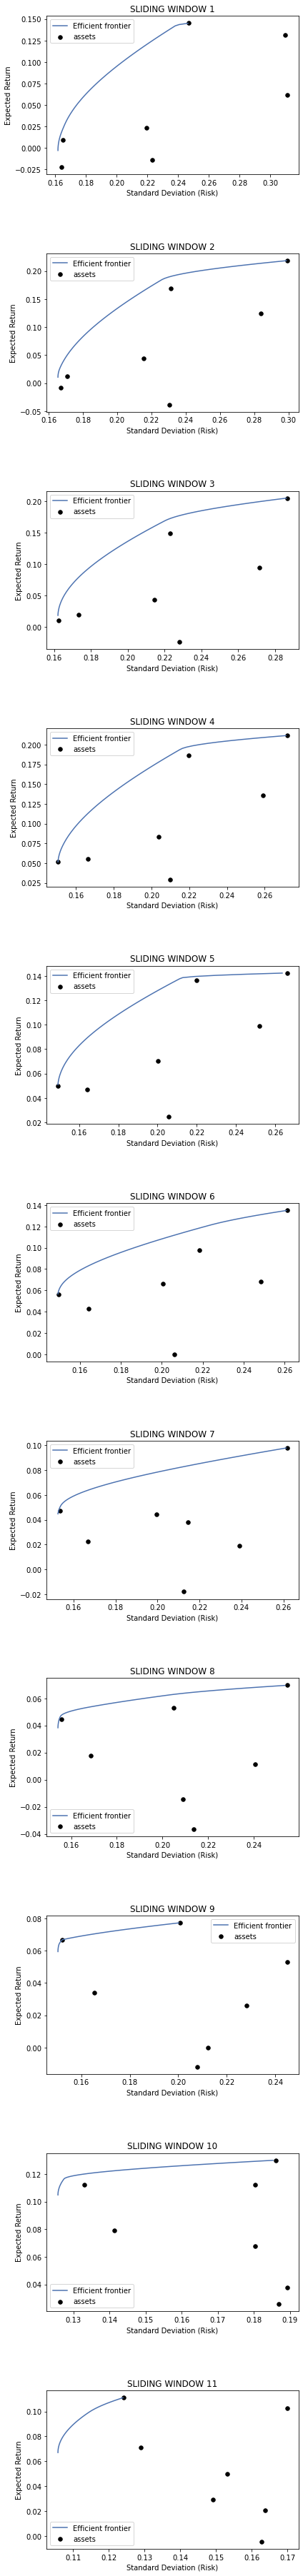

In [19]:
from pypfopt import EfficientFrontier
from pypfopt import plotting

# Create a figure and a 3x3 grid of subplots
fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()

### The results are the same, we can use the library to use compute the efficient frontier with risk free rate 1

## Efficient frontier risk free rate

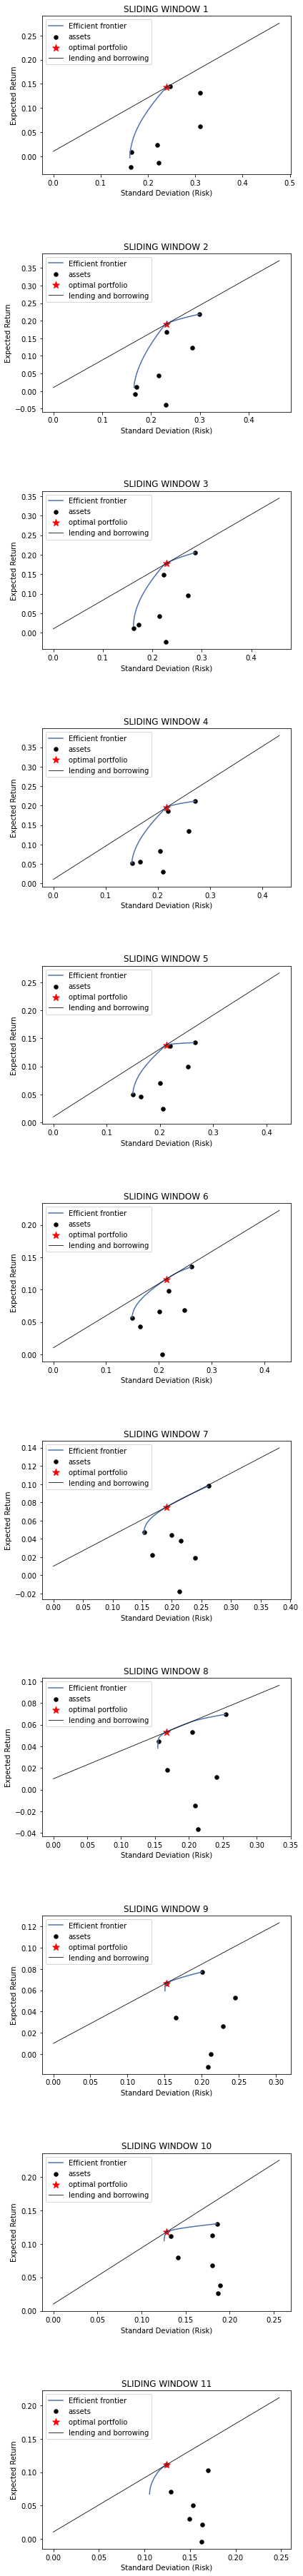

In [20]:
Rf = 0.01


fig, axs = plt.subplots(11, figsize=(6, 50))

# Loop through the subplots and plot something on each of them
for i in range(11):
    ef = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    plotting.plot_efficient_frontier(ef, ax=axs[i], show_assets=True)
    #need to create another instance
    ef2 = EfficientFrontier(sliding_windows_data[str(i+1)+'_yearly_mean'], sliding_windows_data[str(i+1)+'_yearly_cov'], weight_bounds=(0, 1))
    Best_portfolio = ef2.max_sharpe(risk_free_rate=0) #best portfolio weights
    stats = ef2.portfolio_performance(verbose=False, risk_free_rate=0)
    Rp = stats[0]
    sigma = stats[1]
    
    xs = np.linspace(0, 2)
    sigma_c = xs * sigma # slide 22 ch05
    Rc = Rf + (Rp - Rf)/sigma * sigma_c
    
    
    opt = axs[i].scatter(sigma, Rp, marker = '*', c = 'red', s=100, label = 'optimal portfolio')#best performance portfolio
    line1, = axs[i].plot(sigma_c, Rc, "-", color="k", linewidth=0.8, label = 'lending and borrowing')
    axs[i].set_xlabel('Standard Deviation (Risk)')
    axs[i].set_ylabel('Expected Return')
    axs[i].legend()
    
count = 0
for ax in axs.flat:
    count +=1
    ax.set_title("SLIDING WINDOW " + str(count))

plt.subplots_adjust(wspace=0.5, hspace=0.5)
# Show the plot
plt.show()


### import 5 real bonds data

In [1]:
# all data from 01/01/2021 to 04/01/2023
#10Y coupon = 4.125 maturity = 15 NOV 2032
#30Y coupon = 4 maturity = 15 NOV 2052
#5Y coupon = 3.875, maturity = 31 DEC 2027
#3Y coupon = 4, maturity = 15 DEC 2025
#2Y coupon = 4.25, maturity 31 DEC 2024
#data imported from investing.com from 01/01/2022 to 04/01/2023 (in order to get more data even if it's outside set date)

import pandas as pd
US10Y = pd.read_csv('United States 10-Year Bond Yield Historical Data.csv')['Price']
US30Y = pd.read_csv('United States 30-Year Bond Yield Historical Data.csv')['Price']
US5Y = pd.read_csv("United States 5-Year Bond Yield Historical Data.csv")['Price']
US3Y = pd.read_csv('United States 3-Year Bond Yield Historical Data.csv')['Price']
US2Y = pd.read_csv('United States 2-Year Bond Yield Historical Data.csv')['Price']
#since it's atreasury bond the yield is already expressed in yield to maturity

In [2]:
bonds = pd.concat([US2Y, US3Y, US5Y, US10Y, US30Y], axis=1)
coupons = [4, 4.25, 3.875, 4.125, 4]
bonds.columns =['US2Y', 'US3Y', 'US5Y', 'US10Y', 'US30Y']
#bonds = bonds.dropna()
bonds

,US2Y,US3Y,US5Y,US10Y,US30Y
0,4.3638,4.1245,3.8540,3.690,3.804
1,4.3803,4.1558,3.9062,3.752,3.852
2,4.4258,4.2242,3.9986,3.879,3.975
3,4.4279,4.2270,4.0004,3.879,3.975
4,4.3656,4.1666,3.9445,3.820,3.904
...,...,...,...,...,...
299,0.8736,1.1383,1.4736,1.728,2.084
300,0.8296,1.0839,1.4260,1.700,2.092
301,0.7599,1.0135,1.3605,1.649,2.059
302,0.7758,1.0216,1.3605,1.637,2.031


In [3]:
#plot YTM vs maturity in day

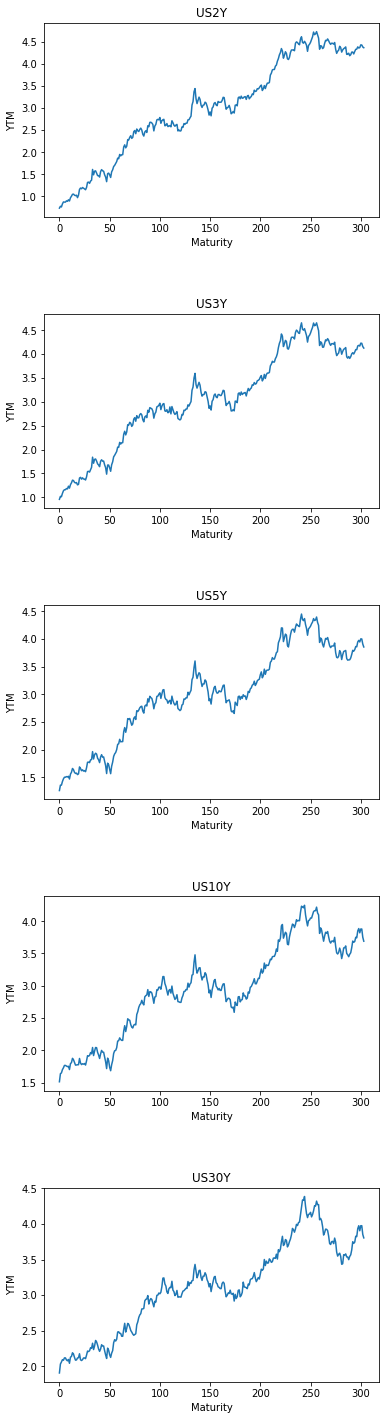

In [4]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(bonds.columns), figsize=(6, 25))

for i in range(len(bonds.columns)):
    y = list(bonds.iloc[:, i].dropna())
    y.reverse()

    axs[i].plot(range(len(y)),y)
    axs[i].set_xlabel('Maturity')
    axs[i].set_ylabel('YTM')
    

count = 0
for ax in axs.flat:
    ax.set_title(bonds.columns[count])
    count +=1
    
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


In [95]:
### tutorial youtube
###https://www.investopedia.com/terms/d/duration.asp

import numpy as np
import pandas as pd
import bond_pricing

def Duration(rate, coupon_rate, frequency, face_value, settlement_date, maturity_date, change_in_yield):
    
    try:
        settlement_date = pd.to_datetime(settlement_date, format="%d/%m/%Y")
    except:
        settlement_date = pd.to_datetime(settlement_date, format="%d-%m-%Y")
        
    try:
        maturity_date = pd.to_datetime(maturity_date, format="%d/%m/%Y")
    except:
        maturity_date = pd.to_datetime(maturity_date, format="%d-%m-%Y")
    
    data = pd.DataFrame()
    rate = rate/100
    coupon_rate = coupon_rate/100
    
    #duration
    n = pd.to_numeric(((pd.to_datetime(maturity_date) - pd.to_datetime(settlement_date))/365).days)
    total_payment = n*frequency #(years times payment freq)
    coupon_payment = coupon_rate/frequency * face_value
    payment = [coupon_payment] *(total_payment-1) + [coupon_payment + face_value] ## all payments [coup, coup, ... coup+par]
    data['period'] = pd.DataFrame(np.arange(1,total_payment + 1)) # number of payments (arange skip last value)
    data['payment'] = pd.DataFrame(payment)
    data['dcoupon'] = data['payment'] / ((1 + rate/frequency)**data['period'])
    data['pv'] = data['dcoupon'] / frequency * data['period'] / data['dcoupon'].sum()#duration formula per period
    duration = data['pv'].sum() #sum to obtain duration
    m_duration = duration / (1+ (rate/frequency))
    
    
    #convexity
    #factor = 1/(data['dcoupon'].sum() * (1+rate/frequency)**2)
    
    #as in the book:
    data['cf'] = (data['payment']*(data['period']**2 + data['period'])) / (1+rate/frequency)**data['period']
    convexity = 0.5* data['cf'].sum() / data['dcoupon'].sum()
    
    #price change = duration + conv  effcts
    price_change = (-duration * change_in_yield ) + ( convexity * (change_in_yield)**2 )
    
    bond_price = data['dcoupon'].sum()#bond_pricing.simple_bonds.bond_price(settle=settlement_date, cpn=coupon_rate, mat=maturity_date, yld=rate, freq=frequency, face=face_value)
    
    corrected_price = (bond_price* price_change) + bond_price  
    
    return duration, m_duration, convexity, price_change, bond_price, corrected_price, data
    
    
    
    
    
       

# Book example

In [96]:
Duration(10, 0, 1,1000, "01/01/2022", "01/01/2027", 0.02)
#bond_pricing.simple_bonds.bond_duration(settle="01/01/2022", mat="01/01/2032", cpn=5/100, yld=5/100, freq=1)

(5.0,
 4.545454545454545,
 15.000000000000002,
 -0.094,
 620.9213230591549,
 562.5547186915944,
    period  payment     dcoupon   pv            cf
 0       1      0.0    0.000000  0.0      0.000000
 1       2      0.0    0.000000  0.0      0.000000
 2       3      0.0    0.000000  0.0      0.000000
 3       4      0.0    0.000000  0.0      0.000000
 4       5   1000.0  620.921323  5.0  18627.639692)

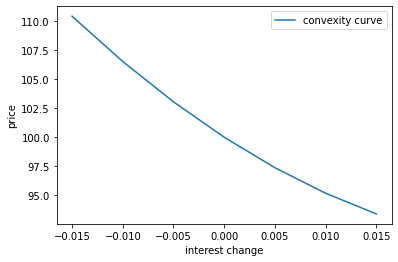

In [115]:
#price change book example
#in the book the prices seems to oscillate more
interest_rate_shift = [-0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015]
l= []
for i in interest_rate_shift:
    l.append(Duration(10, 10,2,100, "01/01/2014", "01/01/2022", i)[5])
plt.plot(interest_rate_shift, l, label="convexity curve")

plt.xlabel("interest change")
plt.ylabel('price')
plt.legend()

In [14]:
#US2Y

BOND (US2Y) DURATION = 1.943990163934486
BOND (US2Y) CONVEXITY = 9.626714999592757


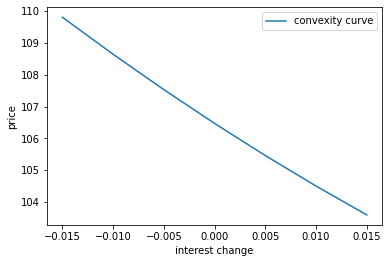

In [110]:
face_value = 100

yields = list(bonds.iloc[:,0])[-4: ]
yields.reverse()
#set day yield
results = Duration(yields[0], coupons[0],2, face_value, "31-12-2022", "31-12-2024", 0)
duration = results[0]
convexity = results[2]
print("BOND (US2Y) DURATION = " + str(duration))
print("BOND (US2Y) CONVEXITY = " + str(convexity))

#print how price will change with some intresets rates changes

interest_rate_shift = [-0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015]
l= []
for i in interest_rate_shift:
    l.append(Duration(yields[0], coupons[0],2, face_value, "31-12-2022", "31-12-2024", i)[5])
plt.plot(interest_rate_shift, l, label="convexity curve")

plt.xlabel("interest change")
plt.ylabel('price')
plt.legend()

BOND (US3Y) DURATION = 2.8563385289552263
BOND (US3Y) CONVEXITY = 19.660227272148703


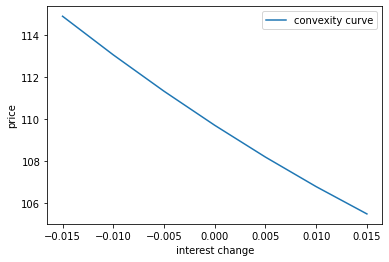

In [111]:
#US3Y
face_value = 100

yields = list(bonds.iloc[:,1])[-(4+16):] #take only last 4 +16 from dec (set date)
yields.reverse()
#set day yield
results = Duration(yields[0], coupons[1], 2, face_value, "15-12-2022", "15-12-2025", 0)
duration = results[0]
convexity = results[2]
print("BOND (US3Y) DURATION = " + str(duration))
print("BOND (US3Y) CONVEXITY = " + str(convexity))

#print how price will change with some intresets rates changes

interest_rate_shift = [-0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015]
l= []
for i in interest_rate_shift:
    l.append(Duration(yields[0], coupons[1], 2, face_value,  "15-12-2022", "15-12-2025", i)[5])
plt.plot(interest_rate_shift, l, label="convexity curve")

plt.xlabel("interest change")
plt.ylabel('price')
plt.legend()

BOND (US5Y) DURATION = 4.621700845631663
BOND (US5Y) CONVEXITY = 49.46320837952424


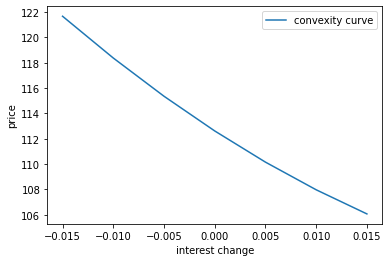

In [112]:
#US5Y
face_value = 100
coupon_payment = coupons[2]/100 * face_value

durations = []
yields = list(bonds.iloc[:,2])
yields.reverse()
for YTM in yields[-(4):]: 
    durations.append(bond_pricing.simple_bonds.bond_duration(settle="2022-12-31", mat="2027-12-31", cpn=coupons[2]/100, yld=YTM/100, freq=2))

face_value = 100

yields = list(bonds.iloc[:,2])[-(4):] 
yields.reverse()
#set day yield
results = Duration(yields[0], coupons[2], 2, face_value, "31-12-2022", "31-12-2027", 0)
duration = results[0]
convexity = results[2]
print("BOND (US5Y) DURATION = " + str(duration))
print("BOND (US5Y) CONVEXITY = " + str(convexity))

#print how price will change with some intresets rates changes

interest_rate_shift = [-0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015]
l= []
for i in interest_rate_shift:
    l.append(Duration(yields[0], coupons[2], 2, face_value,  "31-12-2022", "31-12-2027", i)[5])
plt.plot(interest_rate_shift, l, label="convexity curve")

plt.xlabel("interest change")
plt.ylabel('price')
plt.legend()

BOND (US10Y) DURATION = 8.502125202835604
BOND (US10Y) CONVEXITY = 168.29406664096874


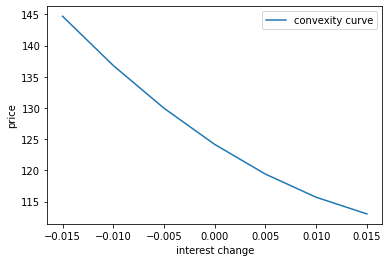

In [118]:
#US10Y
face_value = 100

yields = list(bonds.iloc[:,3])[-(4 + 31 + 15):] 
yields.reverse()
#set day yield
results = Duration(yields[0], coupons[3], 2, face_value, "15-11-2022", "15-11-2032", 0)
duration = results[0]
convexity = results[2]
print("BOND (US10Y) DURATION = " + str(duration))
print("BOND (US10Y) CONVEXITY = " + str(convexity))

#print how price will change with some intresets rates changes

interest_rate_shift = [-0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015]
l= []
for i in interest_rate_shift:
    l.append(Duration(yields[0], coupons[3], 2, face_value,  "15-11-2022", "15-11-2032", i)[5])
plt.plot(interest_rate_shift, l, label="convexity curve")

plt.xlabel("interest change")
plt.ylabel('price')
plt.legend()

BOND (US30Y) DURATION = 20.03222470522991
BOND (US30Y) CONVEXITY = 1037.1339648784594


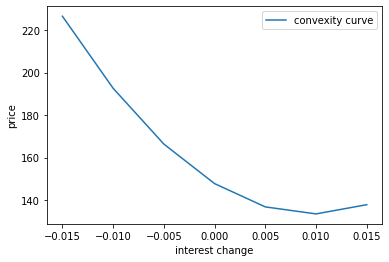

In [123]:
#US30Y
face_value = 100

yields = list(bonds.iloc[:,4])[-(4 + 31 + 15):] 
yields.reverse()
#set day yield
results = Duration(yields[0], coupons[4], 2, face_value, "15-11-2022", "15-11-2052", 0)
duration = results[0]
convexity = results[2]
print("BOND (US30Y) DURATION = " + str(duration))
print("BOND (US30Y) CONVEXITY = " + str(convexity))

#print how price will change with some intresets rates changes

interest_rate_shift = [-0.015, -0.01, -0.005, 0, 0.005, 0.01, 0.015]
l= []
for i in interest_rate_shift:
    l.append(Duration(yields[0], coupons[4], 2, face_value,  "15-11-2022", "15-11-2052", i)[5])
plt.plot(interest_rate_shift, l, label="convexity curve")

plt.xlabel("interest change")
plt.ylabel('price')
plt.legend()